In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(i) Load the .csv file into the notebook.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/DataTensor/hdb/main/resale-flat-prices.csv")

In [3]:
df.sample(3)

,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
35654,35654,2018-09,JURONG WEST,4 ROOM,431,JURONG WEST AVE 1,07 TO 09,103.0,Model A,1985,315000.0
20086,20086,2017-12,SENGKANG,5 ROOM,203E,COMPASSVALE RD,10 TO 12,110.0,Improved,2000,455000.0
24830,24830,2018-04,BEDOK,4 ROOM,220B,BEDOK CTRL,07 TO 09,87.0,Model A,2010,635000.0


(ii) Summarize the information that can be derived from the dataset, including key
features (columns), range of values, and missing / non-useful values. All the
information should be derived by necessary Python codes.

In [4]:
df.columns

Index(['transaction_id', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price'],
      dtype='object')

In [5]:
df.describe()

,transaction_id,floor_area_sqm,lease_commence_date,resale_price
count,77895.000000,77895.000000,77895.000000,7.789500e+04
mean,38947.000000,97.612341,1994.039155,4.386677e+05
std,22486.493946,24.295162,12.783561,1.532126e+05
min,0.000000,31.000000,1966.000000,1.400000e+05
25%,19473.500000,82.000000,1984.000000,3.300000e+05
50%,38947.000000,95.000000,1994.000000,4.080000e+05
75%,58420.500000,113.000000,2003.000000,5.130000e+05
max,77894.000000,249.000000,2019.000000,1.232000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77895 entries, 0 to 77894
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       77895 non-null  int64  
 1   month                77895 non-null  object 
 2   town                 77895 non-null  object 
 3   flat_type            77817 non-null  object 
 4   block                77895 non-null  object 
 5   street_name          77895 non-null  object 
 6   storey_range         77739 non-null  object 
 7   floor_area_sqm       77895 non-null  float64
 8   flat_model           77895 non-null  object 
 9   lease_commence_date  77895 non-null  int64  
 10  resale_price         77895 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 6.5+ MB


In [7]:
df.isna().sum()# sum of missing values in each column

transaction_id           0
month                    0
town                     0
flat_type               78
block                    0
street_name              0
storey_range           156
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
dtype: int64

In [8]:
df.dtypes

transaction_id           int64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [9]:
df.shape

(77895, 11)

(iii) Explain TWO (2) potential insights that can be derived from the dataset.

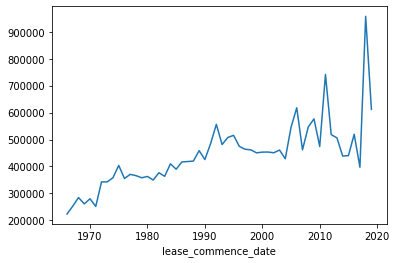

In [10]:
df.groupby("lease_commence_date").mean()["resale_price"].plot()

In [11]:
df.groupby("flat_model").mean()["resale_price"]

flat_model
2-room                    2.295000e+05
Adjoined flat             6.745290e+05
Apartment                 6.087442e+05
DBSS                      7.638527e+05
Improved                  4.502800e+05
Improved-Maisonette       6.804920e+05
Maisonette                6.704365e+05
Model A                   4.223038e+05
Model A-Maisonette        7.004836e+05
Model A2                  3.424281e+05
Multi Generation          8.035586e+05
New Generation            3.294380e+05
Premium Apartment         4.615875e+05
Premium Apartment Loft    8.775277e+05
Premium Maisonette        7.465000e+05
Simplified                3.390103e+05
Standard                  3.927329e+05
Terrace                   8.075762e+05
Type S1                   9.252694e+05
Type S2                   1.027543e+06
Name: resale_price, dtype: float64

(i) Refer to Q1(a)(ii), remove all the data rows with missing data values.

In [12]:
df.dropna(inplace=True)
df.shape

(77661, 11)

(ii) In Singapore, HDB flats have a 99 years’ leasehold. Compute the remaining
lease in years for each transacted flat on its transacted date.

In [13]:
remaining_lease_in_years = 99-([pd.to_datetime(f).year for f in df.month]- df["lease_commence_date"])

In [14]:
remaining_lease_in_years

0        61
1        60
2        62
3        62
4        62
         ..
77889    64
77890    66
77891    66
77892    65
77894    66
Name: lease_commence_date, Length: 77661, dtype: int64

In [15]:
df["remaining_lease_in_years"] = remaining_lease_in_years

(iii) List out the top ten of remaining lease in years (computed by Q1(b)(ii) having
the greatest number of transacted flats.

In [16]:
df.groupby("remaining_lease_in_years").count().sort_values(by="street_name",ascending=False).head(10).index

Int64Index([95, 94, 66, 65, 67, 68, 79, 64, 78, 82], dtype='int64', name='remaining_lease_in_years')

In [17]:
df.to_csv("Cleaned.csv")

In [18]:
df.head(1)

,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_years
0,0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,61


(a) Design and apply a Python ORM(s) (Object Relational Mapping) to store the CSV file
obtained in Q1(c). Please specify a table class before inserting the values into the
database.

In [19]:
from sqlalchemy import Column, Integer, Float, Date, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

Base = declarative_base()
#Create the database

class Resale_Flat_Prices(Base):
    __tablename__ = 'Resale_Flat_Prices'
    #tell SQLAlchemy the name of column and its attributes:
    transaction_id = Column(Integer,primary_key=True) 
    month = Column(Date)
    town = Column(String)
    flat_type = Column(String)
    block = Column(String)
    street_name = Column(String)
    storey_range = Column(String)
    floor_area_sqm = Column(Float)
    flat_model = Column(String)
    lease_commence_date = Column(Integer)
    resale_price = Column(Float)



In [20]:
engine = create_engine('sqlite:///csv_test.db')
Base.metadata.drop_all(engine)
Base.metadata.create_all(engine)
# Base.metadata

data = pd.read_csv("Cleaned.csv")
data = data.values.tolist()
# Create the session
session = sessionmaker(bind=engine)
s = session()

for i in data:
    record = Resale_Flat_Prices(**{"transaction_id" : i[1],
        "month" : pd.to_datetime(i[2]), "town" : i[3], "flat_type" : i[4], "block" : i[5],
        'street_name' : i[6],"storey_range" : i[7],"floor_area_sqm" : i[8],"flat_model" : i[9],"lease_commence_date" : i[10],"resale_price" : i[11]})
    s.add(record) #Add all the records
s.commit() #Attempt to commit all the records
s.close() #Close the connection
# len(data)

(b) Compose queries on the database and answer the following questions:
(i) What is the total number of transactions for each month?
(ii) Sort the data by town and the number of resale transactions in descending order.
(iii) For resales transacted on and after Jan 2019 and storey range being level 10
and above, what are the top three towns having the greatest number of
transactions?

In [21]:
data = s.query(Resale_Flat_Prices)

In [23]:
date=[]
for a in data:
    date.append(a.month)
uni = list(dict.fromkeys(date))
for a in uni:
    co=date.count(a)
    print(a,co)

2017-01-01 1181
2017-02-01 1083
2017-03-01 1896
2017-04-01 1836
2017-05-01 1975
2017-06-01 1742
2017-07-01 1777
2017-08-01 1958
2017-09-01 1672
2017-10-01 1779
2017-11-01 1975
2017-12-01 1580
2018-01-01 1070
2018-02-01 1181
2018-03-01 1877
2018-04-01 1833
2018-05-01 1736
2018-06-01 1970
2018-07-01 2529
2018-08-01 2061
2018-09-01 1977
2018-10-01 1982
2018-11-01 1862
2018-12-01 1419
2019-01-01 1539
2019-02-01 1301
2019-03-01 1648
2019-04-01 1913
2019-05-01 2065
2019-06-01 1880
2019-07-01 2106
2019-08-01 1896
2019-09-01 1821
2019-10-01 2203
2019-11-01 1900
2019-12-01 1842
2020-01-01 1906
2020-02-01 1658
2020-03-01 1936
2020-04-01 422
2020-05-01 362
2020-06-01 2432
2020-07-01 2456
2020-08-01 2424


In [49]:
data1 = s.query(Resale_Flat_Prices).order_by(Resale_Flat_Prices.town,Resale_Flat_Prices.resale_price)
for a in data1:
  print(a.town,a.resale_price)

Streaming output truncated to the last 5000 lines.
JURONG WEST 395000.0
JURONG WEST 393888.0
JURONG WEST 392000.0
JURONG WEST 390000.0
JURONG WEST 390000.0
JURONG WEST 388000.0
JURONG WEST 386000.0
JURONG WEST 385000.0
JURONG WEST 383000.0
JURONG WEST 380000.0
JURONG WEST 380000.0
JURONG WEST 380000.0
JURONG WEST 380000.0
JURONG WEST 376500.0
JURONG WEST 375000.0
JURONG WEST 375000.0
JURONG WEST 373000.0
JURONG WEST 368000.0
JURONG WEST 362000.0
JURONG WEST 360000.0
JURONG WEST 360000.0
JURONG WEST 360000.0
JURONG WEST 358000.0
JURONG WEST 355000.0
JURONG WEST 355000.0
JURONG WEST 352000.0
JURONG WEST 350000.0
JURONG WEST 350000.0
JURONG WEST 350000.0
JURONG WEST 348000.0
JURONG WEST 347000.0
JURONG WEST 346500.0
JURONG WEST 345000.0
JURONG WEST 343000.0
JURONG WEST 343000.0
JURONG WEST 342000.0
JURONG WEST 340000.0
JURONG WEST 340000.0
JURONG WEST 335000.0
JURONG WEST 335000.0
JURONG WEST 335000.0
JURONG WEST 335000.0
JURONG WEST 330000.0
JURONG WEST 325000.0
JURONG WEST 320000.0
JURO

In [27]:
data3 = s.query(Resale_Flat_Prices).filter(Resale_Flat_Prices.month>=pd.to_datetime("2019-01"))

In [28]:
data4 = []
for a in data3:
    b=a.storey_range.split(" ")
    if int(b[0])>=10:
        data4.append(a)

In [29]:
towns = []
for a in data4:
    towns.append(a.town)
uni = list(dict.fromkeys(towns))
town_transaction = {}
for b in uni:
    co = towns.count(b)
    town_transaction[b] = co
a=sorted(town_transaction.items(), key=lambda x: x[1], reverse=True)
a[0:3]

[('SENGKANG', 1605), ('PUNGGOL', 1065), ('JURONG WEST', 883)]

(a) Load the CSV file obtained from Q1(c) to a Pandas dataframe and derive the answers
for the same three questions in Q2(b)

In [30]:
df=pd.read_csv("Cleaned.csv")

In [32]:
df.month.value_counts().sort_index()

2017-01    1181
2017-02    1083
2017-03    1896
2017-04    1836
2017-05    1975
2017-06    1742
2017-07    1777
2017-08    1958
2017-09    1672
2017-10    1779
2017-11    1975
2017-12    1580
2018-01    1070
2018-02    1181
2018-03    1877
2018-04    1833
2018-05    1736
2018-06    1970
2018-07    2529
2018-08    2061
2018-09    1977
2018-10    1982
2018-11    1862
2018-12    1419
2019-01    1539
2019-02    1301
2019-03    1648
2019-04    1913
2019-05    2065
2019-06    1880
2019-07    2106
2019-08    1896
2019-09    1821
2019-10    2203
2019-11    1900
2019-12    1842
2020-01    1906
2020-02    1658
2020-03    1936
2020-04     422
2020-05     362
2020-06    2432
2020-07    2456
2020-08    2424
Name: month, dtype: int64

In [33]:
df.sort_values(by=["town","resale_price"],ascending=False)

,Unnamed: 0,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_years
38668,38779,38779,2018-10,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,868000.0,68
44790,44923,44923,2019-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,840000.0,67
36687,36788,36788,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,179.0,Multi Generation,1987,825000.0,68
52296,52445,52445,2019-06,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1987,798888.0,67
56297,56460,56460,2019-08,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,788888.0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58121,58293,58293,2019-10,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,186000.0,58
36689,36790,36790,2018-10,ANG MO KIO,2 ROOM,116,ANG MO KIO AVE 4,01 TO 03,44.0,Improved,1978,185000.0,59
54403,54560,54560,2019-08,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1977,185000.0,57
56299,56462,56462,2019-09,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,178000.0,66


In [34]:
df.month=pd.to_datetime(df.month)
df1=df[df.month>=pd.to_datetime("2019-01")]
df1

,Unnamed: 0,transaction_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_years
41951,42070,42070,2019-01-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,270000.0,61
41952,42071,42071,2019-01-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,295000.0,56
41953,42072,42072,2019-01-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,270000.0,58
41954,42073,42073,2019-01-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,230000.0,58
41955,42074,42074,2019-01-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,262500.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77656,77889,77889,2020-08-01,YISHUN,EXECUTIVE,258,YISHUN ST 22,01 TO 03,154.0,Maisonette,1985,530000.0,64
77657,77890,77890,2020-08-01,YISHUN,EXECUTIVE,611,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,598000.0,66
77658,77891,77891,2020-08-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,510000.0,66
77659,77892,77892,2020-08-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,07 TO 09,142.0,Apartment,1986,555000.0,65


In [35]:
list1=[]
for a in df1.storey_range:
    b=a.split(" ")
    list1.append(int(b[0]))
df1["storey"]=list1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
df2=df1[df1.storey>=10]

In [37]:
df2.town.value_counts()[:3]

SENGKANG       1605
PUNGGOL        1065
JURONG WEST     883
Name: town, dtype: int64

(i) Design a function to find the top three towns of each month with the greatest
number of transactions.

In [38]:
def top_three(dataframe,date):
    top_3=dataframe[dataframe.month==date].town.value_counts()
    return top_3.head(3)

In [39]:
for a in df.month.unique():
    print(a)
    print(top_three(df,a))

2017-01-01T00:00:00.000000000
JURONG WEST    112
WOODLANDS       83
TAMPINES        82
Name: town, dtype: int64
2017-02-01T00:00:00.000000000
SENGKANG     83
YISHUN       82
WOODLANDS    74
Name: town, dtype: int64
2017-03-01T00:00:00.000000000
SENGKANG       146
JURONG WEST    143
WOODLANDS      131
Name: town, dtype: int64
2017-04-01T00:00:00.000000000
JURONG WEST    142
WOODLANDS      136
SENGKANG       132
Name: town, dtype: int64
2017-05-01T00:00:00.000000000
JURONG WEST    162
WOODLANDS      154
SENGKANG       153
Name: town, dtype: int64
2017-06-01T00:00:00.000000000
SENGKANG       142
JURONG WEST    130
WOODLANDS      128
Name: town, dtype: int64
2017-07-01T00:00:00.000000000
WOODLANDS      143
SENGKANG       139
JURONG WEST    136
Name: town, dtype: int64
2017-08-01T00:00:00.000000000
JURONG WEST    158
WOODLANDS      145
SENGKANG       141
Name: town, dtype: int64
2017-09-01T00:00:00.000000000
JURONG WEST    139
WOODLANDS      134
PUNGGOL        130
Name: town, dtype: int64
2

(ii) Draw ONE (1) figure to show the median resale price in 2020 of each town.

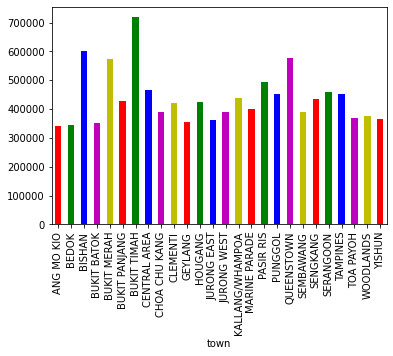

In [40]:
data_2020=df[df.month>=pd.to_datetime("2020-01")]
data_2020.groupby('town')['resale_price'].median().plot(kind="bar",color=list("rgbmy"))

(iii) For the town with the greatest number of transactions in 2020, draw ONE (1)
figure to visualize the median resale price per flat type for each month.

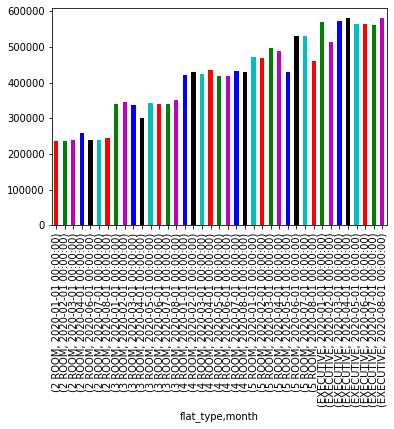

In [ ]:
town_with_most_transactions=data_2020.town.value_counts().index[0]
df3=data_2020[data_2020.town==town_with_most_transactions]
df3.groupby(["flat_type","month"]).median()["resale_price"].plot(kind="bar",color=list("rgmbkc"))

we cant find out correlation between storey range and resale price,as the storey range is in string format, we can get it by splitting storey range in lower and upper storey limit and then find the correlation

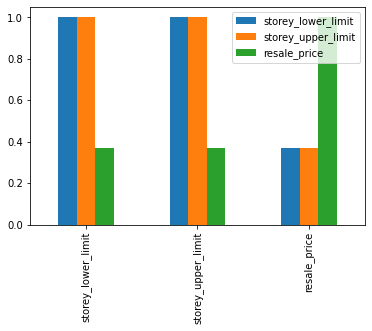

In [ ]:
list1=[]
list2=[]
for a in df.storey_range:
  b=a.split(" ")
  list1.append(int(b[0]))
  list2.append(int(b[-1]))
df["storey_lower_limit"]=list1
df["storey_upper_limit"]=list2
df.loc[:,["storey_lower_limit","storey_upper_limit","resale_price"]].corr().plot(kind="bar")

(v) Is there any correlation between the remaining lease in years and resale price?
Draw ONE (1) figure to visualize the correlation.

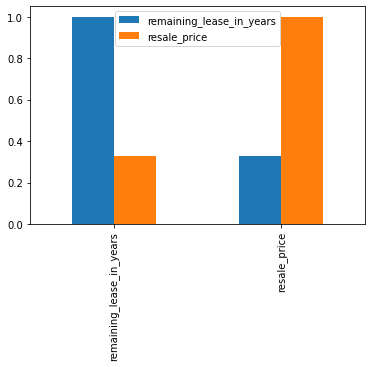

In [ ]:
df.loc[:,["remaining_lease_in_years","resale_price"]].corr().plot(kind="bar")

(vi) For Yishun, draw ONE (1) figure to visualize how was the median resale price
being changed over time per flat type?

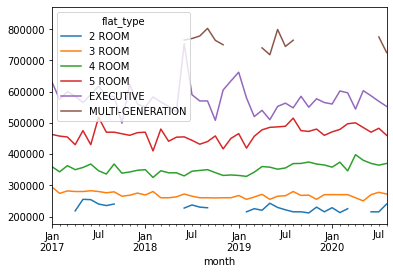

In [ ]:
df[df.town=="YISHUN"].groupby(["flat_type","month"]).median()["resale_price"].unstack().T.plot()

some lines are broken because of the missing data